In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Shorthand
usualCols = ['time', 'ecg', 'sca']
x = 'time'
sca = 'sca'
ecg = 'ecg'

In [112]:
def plotSubplot(df, xmin=0, xmax=4, ymin=-400, ymax=400, ymin2= -100, ymax2= 100, step = 100,
                linewidth=1, title='', file_name='', sharex=True, save = False):
    
    f, ax = plt.subplots(2, 1, figsize=(10,6))

    ax[0].plot(df[x], df[ecg])
    ax[0].set(xlim = (xmin, xmax), ylim = (ymin, ymax), yticks = np.arange(ymin, ymax + step, step), 
             xticks = np.arange(xmin, xmax))

    ax[1].plot(df[x], df[sca])
    ax[1].set(xlim = (xmin, xmax), ylim = (ymin2, ymax2), xlabel = ('Time (s)'))

    for ax in ax:
        ax.label_outer()
        ax.set_ylabel("Transducer Output (mV)")
        
    if save: 
        plt.savefig()    

In [4]:
import os

In [5]:
os.getcwd()

'/Users/adrienneterrado'

In [7]:
os.chdir('/Users/adrienneterrado/Desktop/Data_Adrienne/ECG Data')

# Calibration

>For this experiment, we used an `isotonic (length) transducer` in order to measure systolic contraction amplitudes (SCA). Because the output is in millivolts, the transducer was calibrated to determine which lengths corresponded to which output potentials. In order to do so, the arm of the isotonic transducer was moved upward in 5 mm increments and the corresponding outputs were collected. 

In [113]:
calibration = pd.read_csv('ecgCalibration.txt', sep='\t', index_col = False, header = None)
calibration.columns = usualCols

In [114]:
df = calibration

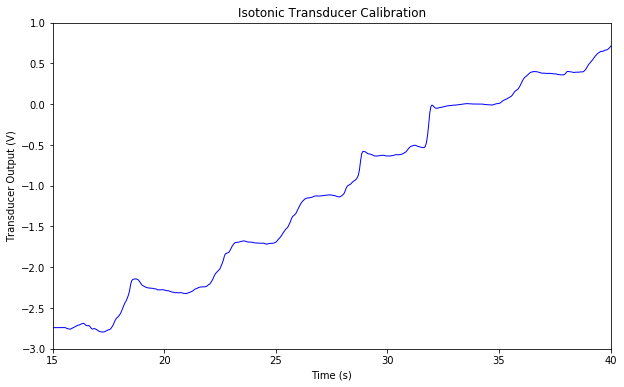

In [119]:
plt.figure(figsize = (10,6))
plt.plot(df[x], df[sca], 'b-', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Transducer Output (V)')
plt.title('Isotonic Transducer Calibration')
plt.xlim(xmin = 15, xmax = 40)
plt.ylim(ymin = -3.0, ymax = 1.0)
plt.show()

In [120]:
df[df['time'].isin([16, 20, 24, 27, 31, 35, 37])]

,time,ecg,sca
386,16.0,1024.0,-2.731
466,20.0,939.3,-2.279
546,24.0,542.9,-1.698
606,27.0,242.6,-1.125
686,31.0,-718.6,-0.528
766,35.0,-1024.0,0.010
806,37.0,-1024.0,0.380


The SCA values are actually exported in `volts`, so we need to multiply by 1000 to obtain values in `millivolts`.

In [122]:
calib_to = df[df['time'].isin([16, 20, 24, 27, 31, 35, 37])]['sca']*1000

In [123]:
calib_sca = [0, 5, 10, 15, 20, 25, 30]

In [124]:
calib = pd.DataFrame({'length': calib_sca , 'to':calib_to})

In [125]:
slope, intercept = np.polyfit(calib.to, calib.length, 1)
slope

0.009254845988043074

>Our calibration slope is 0.009 (mm/mV).

# Verify

> The next step is to verify that our set-up is correct. This set-up consisted of:\
\
 `1.` Threading a suture through the apex of the frog ventricle and attaching this suture the arm of the isotonic transducer. The arm is then counterbalanced with clay. \
 `2.` Placing recording electrodes on the frog heart, with the positive recording electrode on atria and the negative electrode on the ventricle. An aligator clip, which serves as the ground electrode, is clipped to a piece of frog tissue.
 
 
> After these steps are completed, we should have both ECG and SCA recordings from cardiac electrical activity and mechanical activity, respectively. 

In [126]:
verify = pd.read_csv('Frog ECG Repeat Verify.txt',
                     sep='\t', index_col=False, skiprows=5, header=None)
verify.columns = usualCols

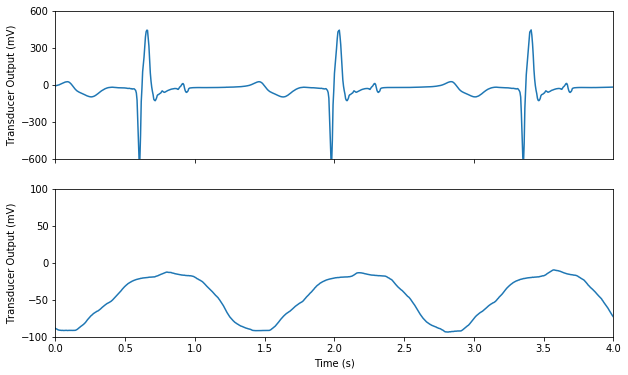

In [127]:
plotSubplot(verify, ymin = -600, ymax = 600, step = 300)

# Autonomic Regulation

## Acetylcholine

In [131]:
# Read in Acetylcholine CSV file
ach = pd.read_csv("ACh.txt", sep = '\t', header = None, error_bad_lines= False)
ach.columns = usualCols
ach.head(3)

b'Skipping line 1280: expected 3 fields, saw 4\nSkipping line 3850: expected 3 fields, saw 4\n'


,time,ecg,sca
0,0.000,11.2,-21.49
1,0.005,11.8,-22.44
2,0.010,12.1,-23.05


`Note`

The SCA outputs for the rest of the data are in millivolts, so there is no need to convert. 

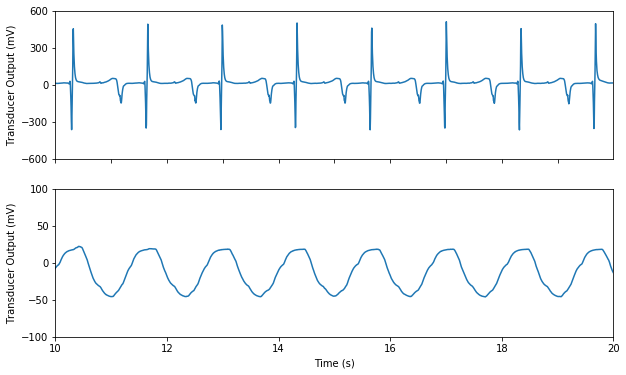

In [129]:
# Acetylcholine Control
plotSubplot(ach, xmin=10, xmax=20, ymin = -600, ymax = 600, step = 300)

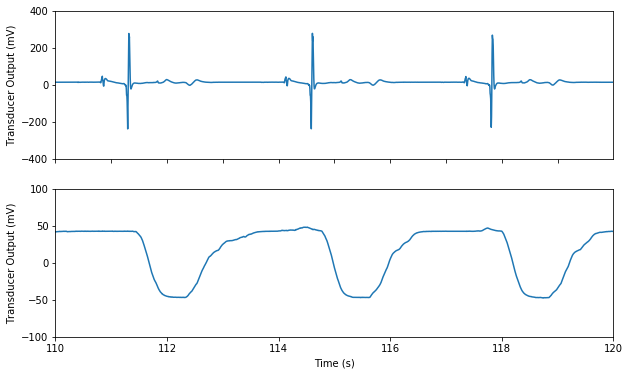

In [130]:
# Acetylcholine Treatmnet
plotSubplot(ach, xmin=110, xmax=120, ymin2=-100, ymax2=100, step = 200)

> Heart rate decreases upon acetylcholine application due to the interaction of acetylcholine with $m_{2}$AChRs on nodal cells. These receptors are coupled to $G_{i}$ proteins, which decreases cAMP levels and increases the efflux of calcium. Both of these effects depress the phase 4 slope and thus decrease heart rate. Changes in SCA reflect the properties of the Frank-Starling Law. With increased time between contractions, the heart is able to fill with more blood and eventually contract harder. 

# Refractory

> In this experiment, we connect our recording electrodes to a Grass Stimulator in order to `pace the heart`. By doing so, we can elucidate on cardiac refractory properties. \
\
We begin by stimulating at 1 Hz. After it's clear that the heart is being paced, the frequency of stimulation is slowly increased until the heart can no longer follow pacing frequency.

In [132]:
refractory = pd.read_csv('Refractory.txt', sep = '\t', error_bad_lines=False, header = None)

refractory.columns = ['time', 'sca']

b'Skipping line 131: expected 2 fields, saw 3\nSkipping line 2600: expected 2 fields, saw 3\nSkipping line 5730: expected 2 fields, saw 3\nSkipping line 6426: expected 2 fields, saw 3\nSkipping line 6600: expected 2 fields, saw 3\nSkipping line 7510: expected 2 fields, saw 3\nSkipping line 8276: expected 2 fields, saw 3\nSkipping line 9024: expected 2 fields, saw 3\nSkipping line 9726: expected 2 fields, saw 3\nSkipping line 10572: expected 2 fields, saw 3\nSkipping line 11486: expected 2 fields, saw 3\nSkipping line 12288: expected 2 fields, saw 3\nSkipping line 13132: expected 2 fields, saw 3\nSkipping line 13656: expected 2 fields, saw 3\n'


`Note` 

One issue with parsing through this data is that **timestamps restart** whenever lab members start and stop data collection on the same file. That means that the time axis is not continuous. In order to get around this, we will generate our own x-axis values so that time increases linearly throughout the course of this data collection.

In [133]:
# The number of data points collected for this file. This equates to the number of time values we need. 
len(refractory)

14042

In [136]:
# Gets the first five time values
refractory.time[0:5]

0    0.000
1    0.025
2    0.050
3    0.075
4    0.100
Name: time, dtype: float64

According to the above values, our Powerlab records data points every **0.025 seconds**. That means that when we create our new time values, we need to start from 0 and add values in steps of 0.025 seconds until we reach the end of the file. 

In [166]:
# np.arange(starting value, ending value, step value)
refractory['time'] = np.arange(0, 0.025*14042, 0.025)

In [167]:
ref = refractory

In [170]:
def plotRefractory(xmin, xmax):
    plt.figure(figsize = (10, 4))
    plt.plot(ref[x], ref[sca])
    plt.xlim(xmin, xmax)
    plt.xlabel("Time (s)")
    plt.ylabel("Transducer Output (mV)")
    plt.ylim(-20, 20)

### Pacing the heart

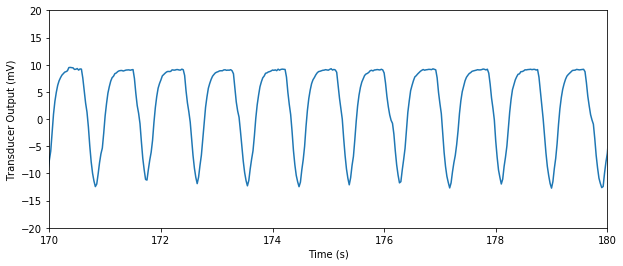

In [172]:
plotRefractory(170, 180)

> Contractions are regular and follow the frequency of stimulation. Each contraction is the same amplitude.

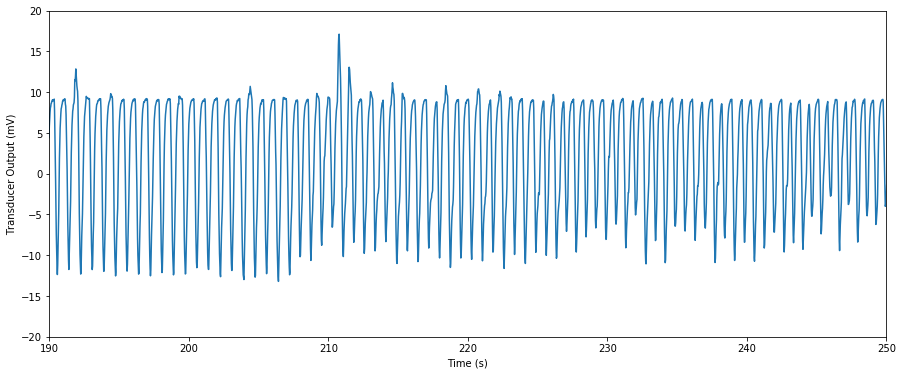

In [173]:
plt.figure(figsize = (15, 6))
plt.plot(df[x], df[sca])
plt.xlim(190, 250)
plt.ylim(-20, 20)
plt.xlabel("Time (s)")
plt.ylabel("Transducer Output (mV)");

> Upon increasing the stimulation frequency, contractions become slightly more irregular but still follow the frequency of stimulation.

### Stimulation in the ventricular refractory period

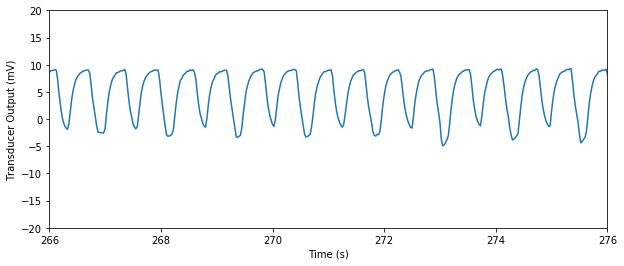

In [174]:
plotRefractory(266, 276)

> Contraction patterns appear M-shaped, where SCA alternates between larger and smaller contractions. The fact that the heart is consistently unable to contract fully at every other stimulus is reflective of a cardiac chamber being in refractory upon stimulation. 
\
\
Because the ventricular contractile cell action potential is longer than that of the atrium (due to the lengthened Phase 2), we know that the ventricular effective refractory period (ERP) is longer. Thus, we would expect that if some cells were in refractory upon stimulation, the first cells to do so would be ventricular contractile cells.

### Stimulating in the refractory period of the whole heart

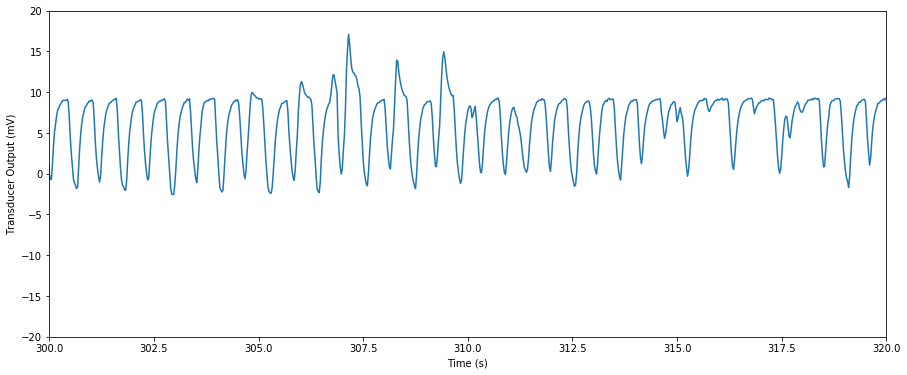

In [145]:
plt.figure(figsize = (15, 6))
plt.plot(df[x], df[sca])
plt.xlim(300, 320)
plt.ylim(-20, 20)
plt.xlabel("Time (s)")
plt.ylabel("Transducer Output (mV)");

> After increasing the stimulus frequency even further, we see that the heart is no longer able to keep pace. In the previous example, contractions were still able to follow the frequency of stimulation because the atrium and sinus venosus were able to contract. Once those chambers are also stimulated in their refractory periods, contractions will appear irregular. 

# Stannius

In [146]:
stannius = pd.read_csv('Stannius.txt', sep = '\t', error_bad_lines=False, header = None)
stannius.columns = usualCols

b'Skipping line 14330: expected 3 fields, saw 4\nSkipping line 43360: expected 3 fields, saw 4\nSkipping line 55800: expected 3 fields, saw 4\nSkipping line 58780: expected 3 fields, saw 4\n'


In [188]:
df = stannius
x = 'time'
ecg = 'ecg'
sca = 'sca'

In [150]:
#Reseting run-time values so that there is only one data point per time value
len(stannius)

187346

In [153]:
# First five time points for the stannius data 
# Data is collected every 5 msec
stannius.time[0:5]

0    0.000
1    0.005
2    0.010
3    0.015
4    0.020
Name: time, dtype: float64

In [155]:
stannius['time'] = np.arange(0, 0.005*187346, 0.005)

In [156]:
df = stannius

## Stannius Control
> The next experiment was run in an effort to determine the electrical conduction pathways of the heart. By separating the frog's cardiac chambers using sutures, we are able to block electrical conduction and determine the presence/absence of pacemakers in the sinus venosus, atrium, and ventricle.

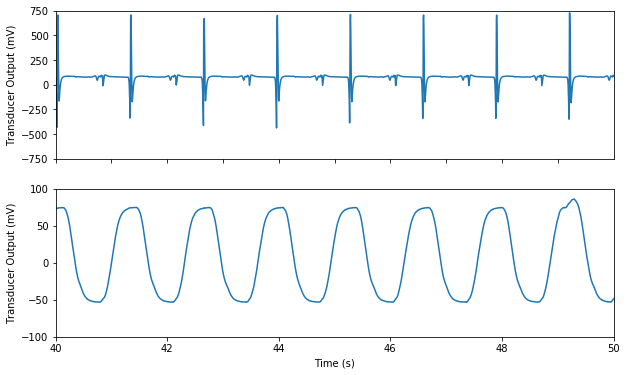

In [158]:
plotSubplot(stannius, ymin= -750, ymax= 750, step = 250, xmin= 40, xmax=50)

## Stannius 2
> Stannius 2 is tied between the `atrium and the ventricle`. Ideally, conduction between the two chambers is `completely ablated` once Stannius 2 is tied.

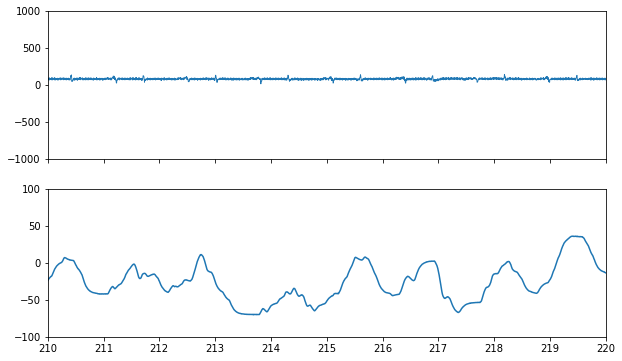

In [189]:
f, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax[0].plot(df[x], df[ecg], linewidth = 0.9)
ax[0].set(ylim = (-1000, 1000), yticks = np.arange(-1000, 1000+500, 500))

ax[1].plot(df[x], stannius[sca])
ax[1].set(xlim = (210, 220), xticks = np.arange(210, 220+1),
         ylim = (-100, 100), yticks = np.arange(-100, 150, 50));

> Here, however, we see that the QRS is still present. \
\
Additionally, when the suture is loosened, the QRS reappears. 

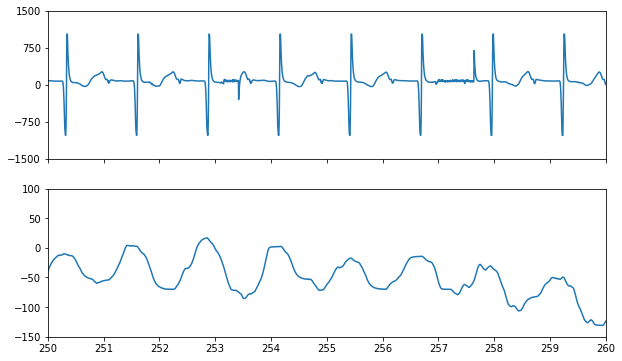

In [191]:
#QRS comes back
f, ax = plt.subplots(2, 1, figsize=(10, 6), sharex = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(ylim = (-1500, 1500), yticks = np.arange(-1500, 1500 + 750, 750))

ax[1].plot(df[x], df[sca])
ax[1].set(xlim = (250, 260), xticks = np.arange(250, 260+1), 
          ylim = (-150, 100), yticks = np.arange(-150, 150, 50));

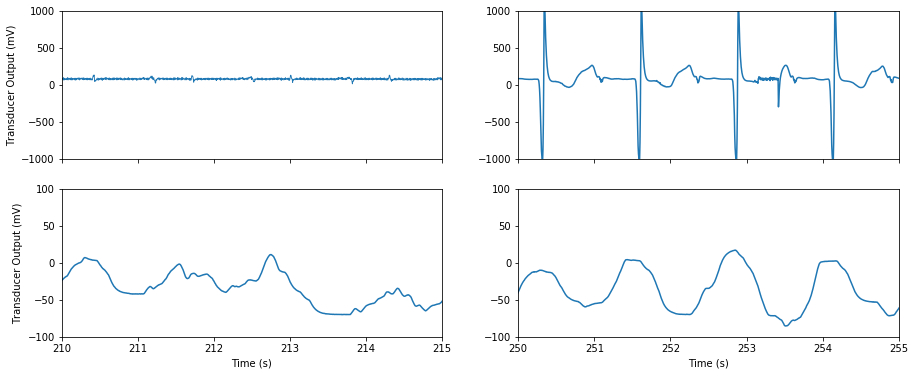

In [192]:
f, ax = plt.subplots(2, 2, figsize=(15, 6), sharex = 'col')

ax[0][0].plot(df[x], df[ecg], linewidth = 0.9)
ax[0][0].set(ylim = (-1000, 1000), yticks = np.arange(-1000, 1000+500, 500))

ax[1][0].plot(df[x], df[sca])
ax[1][0].set(xlim = (210, 215), xticks = np.arange(210, 216),
         ylim = (-100, 100), yticks = np.arange(-100, 150, 50))

ax[0][1].plot(df[x], df[ecg])
ax[0][1].set(ylim = (-1000, 1000), yticks = np.arange(-1000, 1000 + 500, 500))

ax[1][1].plot(df[x], df[sca])
ax[1][1].set(xlim = (250, 255), xticks = np.arange(250, 255+1), 
          ylim = (-100, 100), yticks = np.arange(-100, 150, 50))

for i in (0, 1):
    ax[1][i].set_xlabel("Time (s)")
    ax[0][0].set_ylabel("Transducer Output (mV)")
    ax[1][0].set_ylabel("Transducer Output (mV)")

## Retie Stannius #2

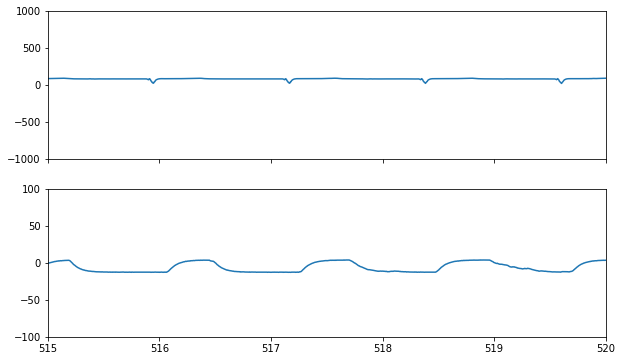

In [193]:
f, ax = plt.subplots(2, 1, figsize=(10, 6), sharex = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(xlim = (515, 520), xticks = np.arange(515, 520+1),
         ylim = (-1000, 1000), yticks = np.arange(-1000, 1000 + 500, 500))

ax[1].plot(df[x], df[sca])
ax[1].set(xlim = (515, 520), ylim = (-100, 100), yticks = np.arange(-100, 150, 50));

> After resuturing, it appears that the QRS (and T waves) disappear. \
\
We should zoom in to see the waves more clearly.

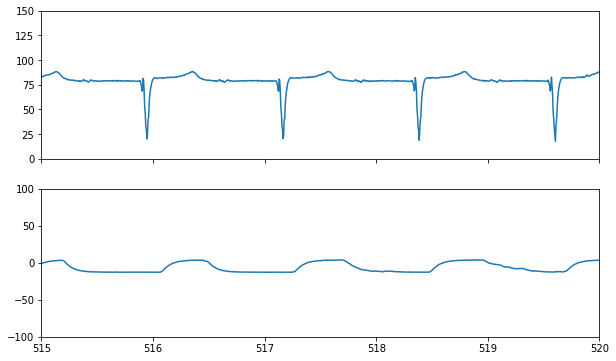

In [194]:
f, ax = plt.subplots(2, 1, figsize=(10, 6), sharex = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(ylim = (0, 150), yticks = np.arange(0, 150 + 25, 25))

ax[1].plot(df[x], df[sca])
ax[1].set(xlim = (515, 520), xticks = np.arange(515, 530+1), 
          ylim = (-100, 100), yticks = np.arange(-100, 150, 50));

Below is the electrical activity recorded after tying Stannius 2. There appear to be two unexpected waves. 

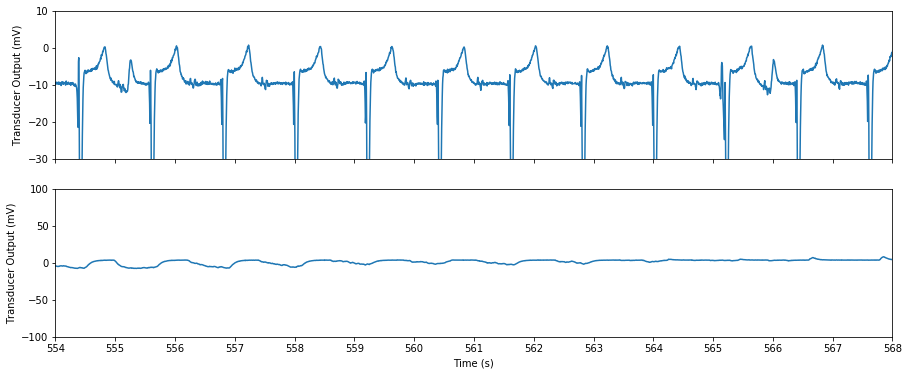

In [110]:
f, ax = plt.subplots(2, 1, figsize=(15, 6), sharex = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(xlim = (554, 568), xticks = np.arange(550, 570+1),
         ylim = (-30, 10), yticks = np.arange(-30, 10 + 10, 10), ylabel = ("Transducer Output (mV)"))

ax[1].plot(df[x], df[sca])
ax[1].set(xlim = (554, 568), ylim = (-100, 100), yticks = np.arange(-100, 150, 50), 
          xlabel= 'Time (s)', ylabel = ("Transducer Output (mV)"));

> When we stack our electrical recordings around both of those aberrant waves (below), we can see that the interval between the appearance of the regularly appearing waves and the aberrant waves is *the same*. This alludes to the idea that whatever is setting the rate of depolarization for the aberrant waves is the same source that is setting the rate of depolarization for the other waves; the only issue is that conduction is blocked intermittently.

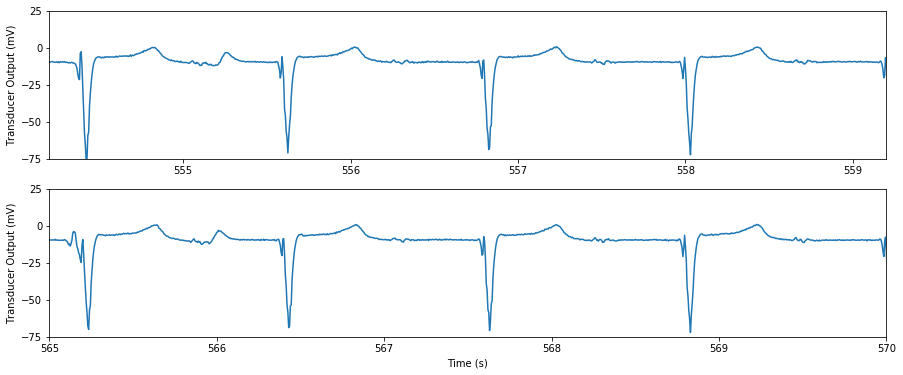

In [253]:
f, ax = plt.subplots(2, 1, figsize=(15, 6), sharey = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(xlim = (554.2, 559.2), xticks = np.arange(550, 570+1))

ax[1].plot(df[x], df[ecg])
ax[1].set(xlim = (565, 570), xlabel= 'Time (s)', ylim = (-75, 25), 
          yticks = np.arange(-75, 25 + 25, 25));

for ax in ax:
    ax.set_ylabel("Transducer Output (mV)")

> It is very likely then that those deviant waves are actually QRS complexes and that this is a **Type 2 second degree AV node block**. If we count the number of SVP waves that occur before a QRS appears, we can see that there is a 9:1 AV node block. 

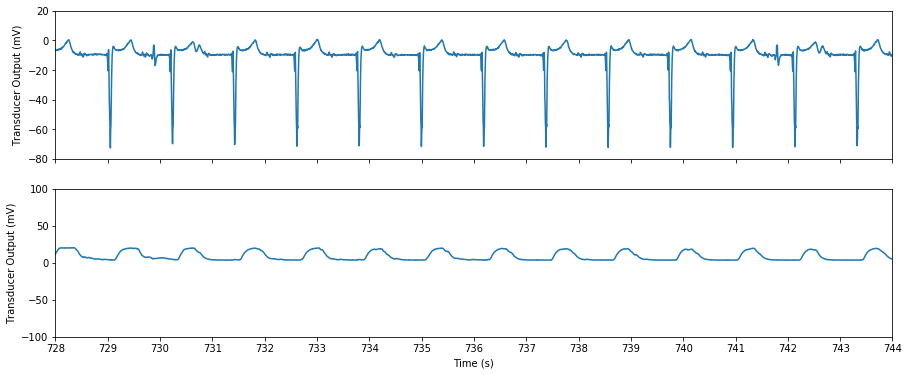

In [140]:
f, ax = plt.subplots(2, 1, figsize=(15, 6), sharex = True)

ax[0].plot(df[x], df[ecg])
ax[0].set(xlim = (728, 744), xticks = np.arange(728, 744+1),
         ylim = (-80, 20), yticks = np.arange(-80, 10 + 20, 20))

ax[1].plot(df[x], df[sca])
ax[1].set(xlim = (728, 744), ylim = (-100, 100), yticks = np.arange(-100, 150, 50),
          xlabel = ("Time (s)"))

for ax in ax:
        ax.label_outer()
        ax.set_ylabel("Transducer Output (mV)")
        
plt.savefig('stannius_hw.jpg', dpi = 500);

> Blockage actually worsens while recording. Here we now have a 10:1 AV node block. 

## Stannius 1

> Stannius 1 is tied between the `sinus venosus and the atria`. Ideally, electrical conduction between the sinus venosus and the atrium is completely ablated.

In [138]:
def plotStannius(df, xmin, xmax, step = 50, ymin = -100, ymax = 100):

    f, ax = plt.subplots(2, 1, figsize=(15, 6), sharex = True)

    ax[0].plot(df[x], df[ecg])
    ax[0].set(xlim = (xmin, xmax), xticks = np.arange(xmin, xmax),
             ylim = (ymin, ymax), yticks = np.arange(ymin, ymax + step, step))

    ax[1].plot(df[x], df[sca])
    ax[1].set(xlim = (xmin, xmax), ylim = (-100, 100), yticks = np.arange(-100, 150, 50),
              xlabel = ("Time (s)"))
    
    for ax in ax:
        ax.label_outer()
        ax.set_ylabel("Transducer Output (mV)");

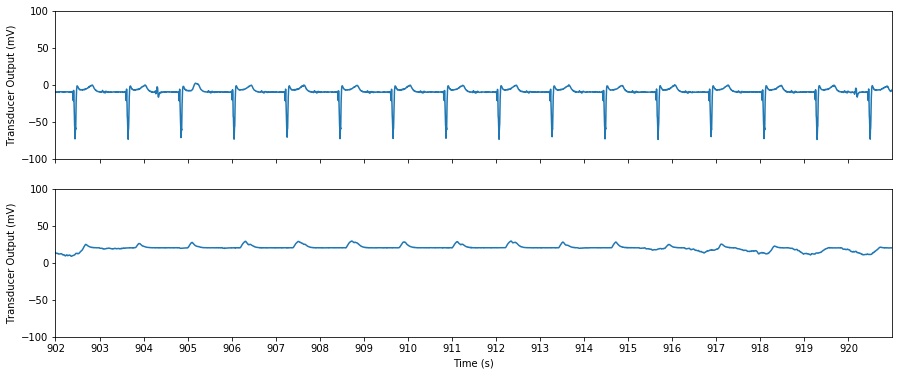

In [139]:
plotStannius(stannius, 902, 921)

> Just as before, we see that aberrant waves appear intermittently. In this recording, they occur around 904 seconds and 920 seconds.

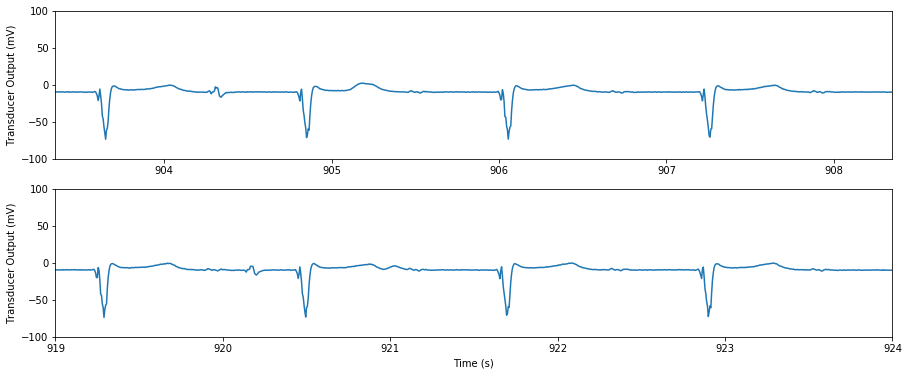

In [254]:
f, ax = plt.subplots(2, 1, figsize = (15, 6), sharey = True)
for i in (0, 1):
    ax[i].plot(df[x], df[ecg])
    ax[0].set(xlim = (903.35, 908.35))
    ax[1].set(xlim = (919, 924), ylim = (-100, 100), xlabel = ("Time (s)"))
    ax[i].set_ylabel("Transducer Output (mV)")

> However, unlike earlier, this wave does not occur consistently after the others. Thus, whatever is causing these cells to depolarize is likely different from whatever is causing the other cells to depolarize. 
\
\
When we successfully tie Stannius 1, electrical signals from the sinus venosus node and sinus venosus can no longer travel into the atria. Thus, the sinus venosus node will set the rate of depolarization for the sinus venosus and the AV node will now set the rate of depolarization for the atrium. Thus, tying Stannius 1 induces a **third degree AV node block**. 

```
```